## Homework 3 - Part 1
## Decision Tree and Random forest

In this homework, you will perform classification on the provided datasets using Decision Tree and Random Forest algorithms. 

The first dataset you will be working with contains 2 features. The second dataset contains 50 features. Both of them have a target label which can be 0 or 1.

You will go step by step with the first dataset. <br>
1 - Use a Decision Tree Classifier and observe the model performance.<br>
2 - Use a Random Forest Classifier and observe the model performance.<br>
3 - Use Grid Search to choose the optimal values for hyperparameters and observe the performance of the best model.


For the second dataset, you are required to generate an optimized Random Forest model using what you have learned in the steps mentioned above.

Dataset 1:
train_2features.csv and test_2features.csv are the training set and testing set respecitvely.


Dataset 2:
train_50features.csv and test_50features.csv are the training set and testing set respecitvely.


To obtain a deterministic behavior, keep the random_state in all algorithms fixed to the value given. 


In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import visualize_2d_data
%matplotlib inline

# Dataset 1

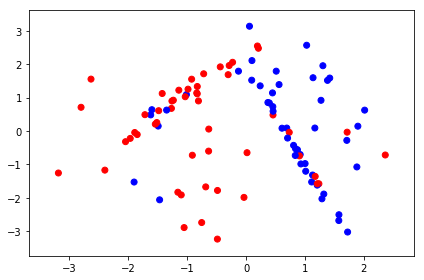

In [64]:
train_df = pd.read_csv("train_2features.csv")
f, ax = visualize_2d_data(train_df)

In [65]:
train_df.head()

,x1,x2,y
0,0.455178,0.727672,1
1,-0.303342,1.684185,0
2,-1.100127,-1.914980,0
3,1.129869,-1.319774,1
4,0.396403,0.836826,1


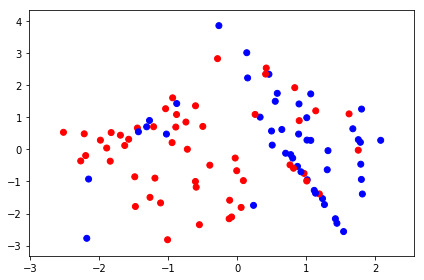

In [66]:
test_df = pd.read_csv("test_2features.csv")
f, ax = visualize_2d_data(test_df)

In [67]:
test_df.head()

,x1,x2,y
0,-1.260875,-1.496315,0
1,1.804029,1.253803,1
2,-1.627030,0.118947,0
3,-1.888437,0.040332,0
4,1.140222,1.199631,0


In [68]:
X_train = train_df[["x1", "x2"]]
y_train = train_df["y"]
X_test = test_df[["x1", "x2"]]
y_test = test_df["y"]

In [69]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(100, 2) (100,)
(100, 2) (100,)


Q. From the above visualizations, what can you tell about the need for a linear/non-linear model for classification?

A. The data distribution is non-linear and linear model for classification like Logistic Regression will not be able to classify between the two classes hence there is a need for non-linear classification models like Decision Trees and Random Forest. 

### Decision Tree
From sklearn.tree use DecisionTreeClassifier to build a classification model with default parameters.

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

In [71]:
### Fit the classifier on the training data

clf = DecisionTreeClassifier(random_state=26)
### WRITE CODE HERE ###
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=26,
            splitter='best')

In [72]:
### Make predictions on the training data


### WRITE CODE HERE ###
y_pred = clf.predict(X_train)

Q. Print accuracy, prediction and recall for the predictions made on the training data. 

In [73]:
### WRITE CODE HERE ###
print (accuracy_score(y_train, y_pred))
print (precision_score(y_train, y_pred))
print (recall_score(y_train, y_pred))

1.0
1.0
1.0


In [74]:
### Make predictions on the testing data


### WRITE CODE HERE ###
y_pred_test = clf.predict(X_test)

Q. Print accuracy, prediction and recall for the predictions made on the testing data. 

In [75]:
### WRITE CODE HERE ###
print (accuracy_score(y_test, y_pred_test))
print (precision_score(y_test, y_pred_test))
print (recall_score(y_test, y_pred_test))

0.69
0.6818181818181818
0.6382978723404256


Q. Plot ROC curve and obtain AUC for test predictions

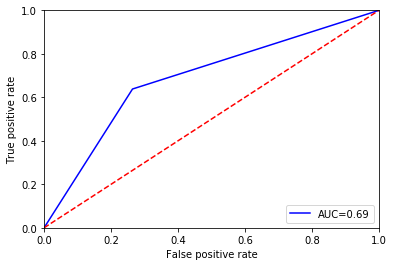

In [76]:
# Plot the ROC curve by giving appropriate names for title and axes. 

### WRITE CODE HERE
from sklearn import metrics
import matplotlib.pyplot as plt
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr ,tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,'b',label="AUC=%0.2f"%roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()

Q. Based on the scores for training set and test set, explain the performance of the above model in terms of bias and variance.

A. In the above case, we get the training accuracy, precision and recall, all as 1.0 which means 100% but when we apply the same model to test data, we get significantly reduced results, i.e 0.69, 0.68 and 0.63 as accuracy, precision and recall respectively. This shows that the data was iniially overfitted. In terms of bias and variace it means that the bias was less since it was able to capture all the data in the training set but when it came to the test set couldn't resolve the data as it was highly adjusted as per the training set distribution. In conjunction with this, it has high variance since the data pays a lot of attention in simplifying the trainig data and in this manner fails to generalise the training data and over fits it. Also, we get an AUC score of 0.69 which means it is okay model which requires fine tuning. 

### Random Forest


Decision Trees have low predictive power compared to other methods due to high variance. Random Forest increases prediction power at the expense of decreased interpretability. 


From sklearn.ensemble use RandomForestClassifier to build a classification model with default parameters.

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
### Fit the classifier on the training data

clf = RandomForestClassifier(random_state=26)

### WRITE CODE HERE ###
clf.fit(X_train, y_train)

/Users/himanshuchandra/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=26, verbose=0, warm_start=False)

In [79]:
### Make predictions on the training data


### WRITE CODE HERE ###
y_pred = clf.predict(X_train)

Q. Print accuracy, prediction and recall for the predictions made on the training data. 

In [80]:
### WRITE CODE HERE ###
print (accuracy_score(y_train, y_pred))
print (precision_score(y_train, y_pred))
print (recall_score(y_train, y_pred))

0.99
1.0
0.9795918367346939


In [81]:
### Make predictions on the testing data


### WRITE CODE HERE ###
y_pred_test = clf.predict(X_test)

Q. Print accuracy, prediction and recall for the predictions made on the testing data. 

In [82]:
### WRITE CODE HERE ###
print (accuracy_score(y_test, y_pred_test))
print (precision_score(y_test, y_pred_test))
print (recall_score(y_test, y_pred_test))

0.72
0.7021276595744681
0.7021276595744681


Q. Plot ROC curve and obtain AUC for the test predictions

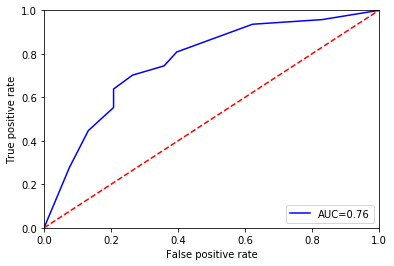

In [83]:
# Plot the ROC curve by giving appropriate names for title and axes. 

### WRITE CODE HERE
from sklearn import metrics
import matplotlib.pyplot as plt
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr ,tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,'b',label="AUC=%0.2f"%roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()

Q. Based on the scores for training set and test set, explain the performance of the above model in terms of bias and variance. Is the Random Forest model better or worse than the Decision Tree model? Explain why you think the performance may have improved or deteriorated. 

A. Based on the above results, the training sets gives the accuracy, precision and recall as 0.99, 1.0 and 0.97 respectively whereas on the test set it gives the values 0.72, 0.70 and 0.70 respectively. This shows a similar case to that of the Decision Trees which is overfitting the data. Overfitting implies Low bias and High variance. The data is too focussed on finding the right model to capture all the data points in the train data and hence, fails to generalize to capture the data in the test set. 

Random Forest is performing better than the Decision Trees as we can see from the scores obtained. This can be because a Random forest is simply a collection of decision trees whose results are aggregated into one final result. Random forest (RF) limits overfitting without substantially increasing error due to bias in the data. Also, it reduces variance by training on different samples of the data and by using a random set of features. Since RF is a collection of decision trees (DT), in each tree we can utilize a subset of features randomly selected. If many trees are included in the forest, eventually many of the features will be included. This limits error due to bias and error due to variance. Also, we get a better AUC score as 0.76 than DT. 

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data. This is separate from "fitting" or "training" the model. The fitting/training procedure is governed by the amount and quality of your training data, as the fitting algorithm is unique to each classifier (e.g. logistic regression or random forest). 

However, there are aspects of some models that are user specified. For example, when using a random forest (which is basically an ensemble of decision trees), it is probably a good idea to choose the right number of underlying trees. Too many and the model might overfit, and too few and the model might not be able to properly learn the data. Parameters such as these are referred to as "hyperparameters" or "free parameters", as the values for these are determined by the user and not the algorithm.

A quick and efficient way to optimize hyperparameters is to perform Grid Search over different values of the parameters. 


In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
# In the below dictionary, fill in the list of values that you want to try out for each parameter
# Refer to the descriptions in sklearn's doc to understand what the parameters depict

param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 10, 15],
    'max_features': [1, 2],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 5, 10, 15],
    'n_estimators': [10, 20, 30, 40, 50, 70]
}

In [86]:
rf = RandomForestClassifier(random_state=26)

In [87]:
grid_search = GridSearchCV(estimator = rf, scoring='f1', param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [88]:
### Fit the training data

### WRITE CODE HERE ###
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 2940 candidates, totalling 8820 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 884 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 2102 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 3800 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 5432 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 5877 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 6404 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 7011 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 7700 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 8813 out of 8820 | elapsed:  4.2min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 8820 out of 8820 | elapsed:  4.2min finished
/Users/himanshuchandra/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=26, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 10, 15], 'max_features': [1, 2], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 3, 5, 10, 15], 'n_estimators': [10, 20, 30, 40, 50, 70]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=2)

In [89]:
### WRITE CODE HERE ###
grid_search.best_score_

0.8295930735930735

Q. Display the parameters of the best model.

In [90]:
### WRITE CODE HERE ###
grid_search.best_params_

{'max_depth': 4,
 'max_features': 1,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 10}

In [92]:
### Using the best model, do the following:
### Make predictions on the training set and display accuracy, precision and recall.
### Make predictions on the testing set and display accuracy, precision and recall. Plot ROC curve and print AUC.

### WRITE CODE HERE ###
rf = RandomForestClassifier(random_state=26, max_depth=4, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
print(accuracy_score(y_train, y_pred))
print(precision_score(y_train, y_pred))
print(recall_score(y_train, y_pred))

0.86
0.8301886792452831
0.8979591836734694


In [93]:
y_pred_test = rf.predict(X_test)
print(accuracy_score(y_test, y_pred_test))
print(precision_score(y_test, y_pred_test))
print(recall_score(y_test, y_pred_test))

0.8
0.7647058823529411
0.8297872340425532


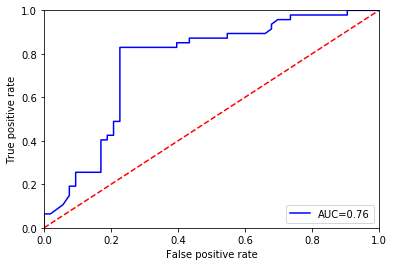

In [94]:
from sklearn import metrics
import matplotlib.pyplot as plt
probs = rf.predict_proba(X_test)
preds = probs[:,1]
fpr ,tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,'b',label="AUC=%0.2f"%roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()

Q. How did performing Grid Search impact the performance of the model? Were you able to optimize the hyperparameters?

A. Performing Grid search definitely increased the performance of the model. The results of the grid search were used to create another model which when trained over the training set gave the scores as 0.86, 0.83 and 0.89 as accuracy, precision and recall respectively and the same model over the test set gave scores as 0.8, 0.76 and 0.82 as accuracy, precision and recall respectively. This shows that the scores have significantly increased than the base model. After hyperparameter tuning we get a better result which fits the data better and generalizes the training set rather than trying to capture all the data points individually. 

Yes, we were able to optimize the hyperparametrs. Using grid search the most optimal value for each of the hyperparameters was selected which gave us the best result on the test data. 


Grid search is operated on the scoring of model's f1 score, so it finds the best f1 score in the given set of parameter ranges. A higher f1 score doesn't mean a higher AUC thereofore the same AUC is obtained even though model has better recall, accuracy and precision. If the grid search was performed with 'roc_auc' as a parameter for scoring, higher auc would have been obtained.
Since it was given to us to calculate . grid search on f1 score than AUC.

# Dataset 2

Given this procedure, you are to optimize a random forest classifier for a dataset with 50 features. Training data are provided, but testing data does not include the labels. It is up to you to use the training data to optimize generalization performance to the test data. You will submit a csv file with your predictions. It should contain one column and the column should be named "y".


In [50]:
train_df = pd.read_csv("train_50features.csv")
test_data = pd.read_csv("test_50features.csv")

In [51]:
X_train = train_df.drop("y", axis = 1)
y_train = train_df["y"]
X_test = test_data

In [52]:
print (X_train.shape, y_train.shape)
print (X_test.shape)

(100, 50) (100,)
(100, 50)


In [54]:
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'max_features': ['log2', 'sqrt'],
    'min_samples_leaf': [ 3, 4, 5,6, 7, 8],
    'min_samples_split': [ 35,37, 40, 42, 45],
    'n_estimators': [ 17, 18, 20,22 ,23,25, 30, ],
    'class_weight': ['balanced', None]
}

In [55]:
rf = RandomForestClassifier(random_state=26)

In [56]:
grid_search = GridSearchCV(estimator = rf, scoring='f1', param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [57]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6720 candidates, totalling 20160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 1972 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 2862 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3916 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 5130 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 6508 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 8046 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 9748 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 11610 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 13636 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 15822 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 18172 tasks   

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=26, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8], 'max_features': ['log2', 'sqrt'], 'min_samples_leaf': [3, 4, 5, 6, 7, 8], 'min_samples_split': [35, 37, 40, 42, 45], 'n_estimators': [17, 18, 20, 22, 23, 25, 30], 'class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=2)

In [59]:
grid_search.best_params_

{'class_weight': None,
 'max_depth': 1,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 40,
 'n_estimators': 20}

In [60]:
grid_search.best_score_

0.799624466571835

In [115]:
rf = RandomForestClassifier(random_state=26, max_depth=1, max_features="sqrt", min_samples_leaf=5, min_samples_split=40, n_estimators=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
print(accuracy_score(y_train, y_pred))
print(precision_score(y_train, y_pred))
print(recall_score(y_train, y_pred))

0.82
0.803921568627451
0.8367346938775511


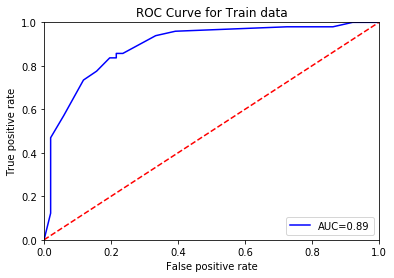

In [116]:
probs = rf.predict_proba(X_train)
preds = probs[:,1]
fpr ,tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,'b',label="AUC=%0.2f"%roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC Curve for Train data')
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()

In [117]:
##########################################
### Construct your final random forest model and optimize the hyperparameters using Grid Search ###
y_pred_test = rf.predict(X_test)

In [118]:
y_pred_test

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0])

In [119]:
y_df = pd.DataFrame(columns = ["y"])

In [120]:
y_df["y"] = y_pred_test
y_df.head()

,y
0,0
1,1
2,0
3,0
4,1


In [122]:
y_df.to_csv("y_test.csv")

Q. What can you tell about the range of values to be considered for each of the parameters mentioned above? Explain the reason for choosing the ranges mentioned in your solution.  Also, how does each of these parameters affect overfitting in the model? 

A. <u>max_depth</u>:
The max_depth parameter specifies the maximum depth of each tree. The default value for max_depth is None, which means that each tree will expand until every leaf is pure. A pure leaf is one where all of the data on the leaf comes from the same class. The higher this value the more a random forest tries to make the model specific to the training data rather than generalising it. Since there are 100 data points we tried it over the range of values 1-10 and we received the answer as 1. This means that the tree is expanding only to 1 level. 

<u>max_features</u>:
This is the number of features to consider for the best fit. The two values put in the grid search are 'sqrt' and 'log2'. The former using 7 features and the latter 6. We get the answer as 'sqrt' which are 7 features. This bodes well with the theory of Random Forests as m = sqrt(p) where p = number of predictors gives the best results. If more features are added in Random Forest, then the model becomes more prone overfitting and all trees in Random Forest tend to be similar to each other if the number of features selected is more. 

<u>min_samples_leaf</u>:
The min_samples_leaf parameter specifies the minimum number of samples required to be at a lead node. The default value for this parameter is 1, which means that every leaf must have at least 1 sample that it classifies. Since, the dataset is small with only 100 samples, it would was assumed that at every split the number of samples in each leaf would be a small number and hence we put the values in grid search as 1 to 10 and got the result as 5. This means that every leaf must have at least 1 sample that it classifies. 

<u>min_samples_split</u>:
The min_samples_split parameter specifies the minimum number of samples required to split an internal leaf node. The default value for this parameter is 2, which means that an internal node must have atleast two samples before it can be split to have a more specific classification. This parameter is inversely proportional to the max_depth parameter. AS the depth increases the number of samples required for the split to take place reduces. In our case we got the max_depth parameter as 1, so this parameter had to be a large value. In the grid search, we put the values from 2 to 50 and got the answer as 40 which follows the inversely proportional rule. min_sample_split parameter can also result in overfitting if the value is kept very low( 2-5) . As the model would split the tree untill 2-5 samples are left in the leaf, which can result in pure leaves.
    
<u>n_estimator</u>:
The n_estimators parameter specifies the number of trees in the forest of the model. The default value for this parameter is 10, which means that 10 different decision trees will be constructed in the random forest. The higher the value of this parameter, the better. But, as the value gets bigger it reaches a saturation level after which if you increase the number of trees it will not affect the result of the model. Grid search returns the value where it first saturates. In our case, that value is 20. 

<u>class_weight</u>:
This parameter is the weights associated with classes. If it is 'None', all classes are supposed to have weight one. If it has 'balanced', it uses the values of 'y' to automatically adjust weights inversely proportional to class frequencies in the input data as - 
n_samples / (n_classes * np.bincount(y)). In our case we got the result as 'None'. 